<a href="https://colab.research.google.com/github/nehaj2026/programming/blob/main/1_20_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/nehaj2026/scratchpad

Cloning into 'scratchpad'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 33 (delta 6), reused 2 (delta 2), pack-reused 24 (from 1)
Receiving objects: 100% (33/33), 33.52 KiB | 5.59 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [2]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()



Download complete
Extracting data files...
Data extracted


In [27]:
import pandas as pd

df = pd.read_csv('/content/data/tech_stocks.csv')

df.tail(5)

df['symbol'].value_counts()


,count
symbol,
MSFT,5899
AAPL,5899
AMZN,5899
NVDA,5633
NFLX,4796
FB,2282
GOOG,1816


In [26]:
df['symbol'].unique()

array(['MSFT', 'AAPL', 'GOOG', 'AMZN', 'FB', 'NFLX', 'NVDA'], dtype=object)

<Axes: >

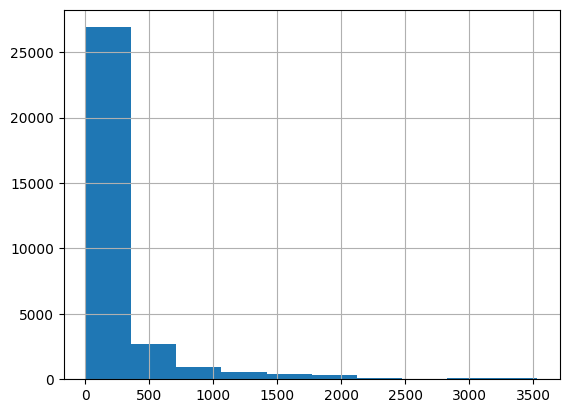

In [28]:
df['close'].hist()

In [33]:
df['close'].describe()

,close
count,32224.000000
mean,237.196459
std,441.134899
min,5.220000
25%,28.487500
50%,81.090000
75%,216.145000
max,3531.450000


In [32]:


df['close_adjusted'].describe()

,close_adjusted
count,32224.000000
mean,202.493255
std,445.265000
min,0.372900
25%,14.487775
50%,37.950000
75%,166.810000
max,3531.450000


<Axes: >

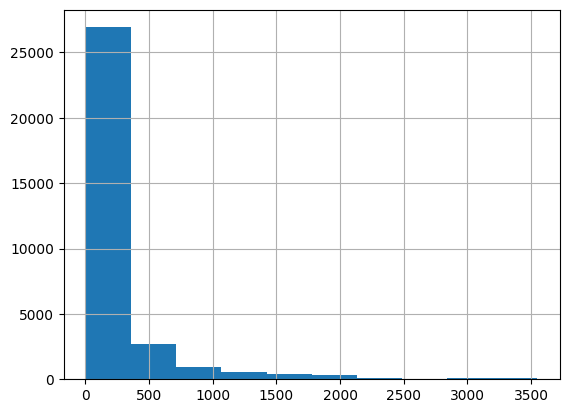

In [29]:
df['open'].hist()

<Axes: >

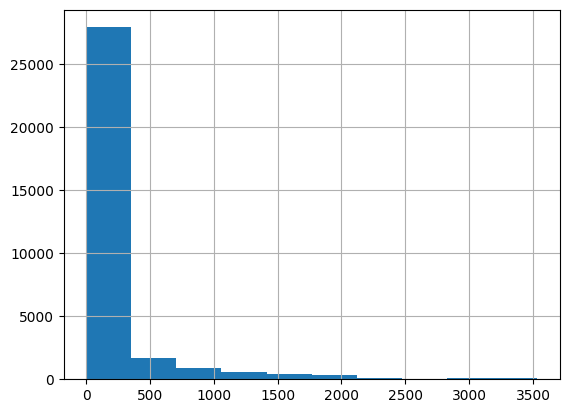

In [31]:
df['close_adjusted'].hist()

In [34]:
df.groupby('symbol')['high'].mean()

,high
symbol,
AAPL,166.144575
AMZN,498.892820
FB,133.849505
GOOG,1039.188256
MSFT,62.955143
NFLX,168.714395
NVDA,77.733289


In [35]:
df.groupby('symbol')['low'].mean()

,low
symbol,
AAPL,162.295925
AMZN,486.935827
FB,130.695800
GOOG,1019.631458
MSFT,61.494318
NFLX,163.285616
NVDA,74.777375


In [36]:
df.groupby('symbol')['high'].mean()-df.groupby('symbol')['low'].mean()

,0
symbol,
AAPL,3.848650
AMZN,11.956993
FB,3.153705
GOOG,19.556798
MSFT,1.460825
NFLX,5.428779
NVDA,2.955914


Google and Amazon are the most volatile, with Google having the highest average share price in both the low and high of the trading day.